In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import re
import collections
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

Below are the figures that we use for the AutoPhrase Web.
The sample dataset is DBLP.5K.txt

### Input Analysis (EDA)

What are the length distributions of documents and sentences? Any outliers?

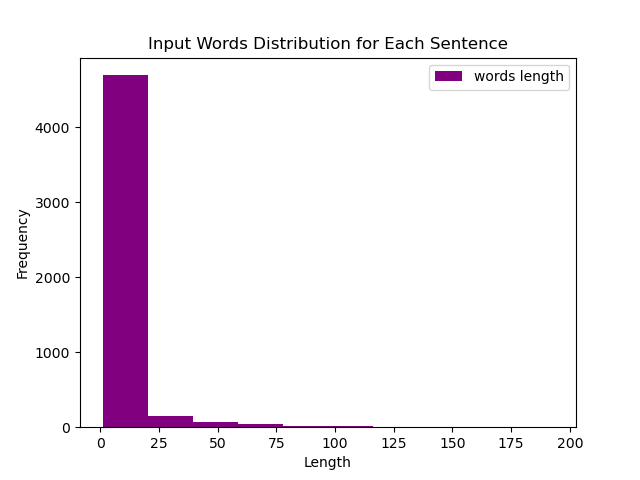

In [3]:
Image("../data/eda/word_distribution.png")

Boxplot Visual would give a better view of the length of documents.

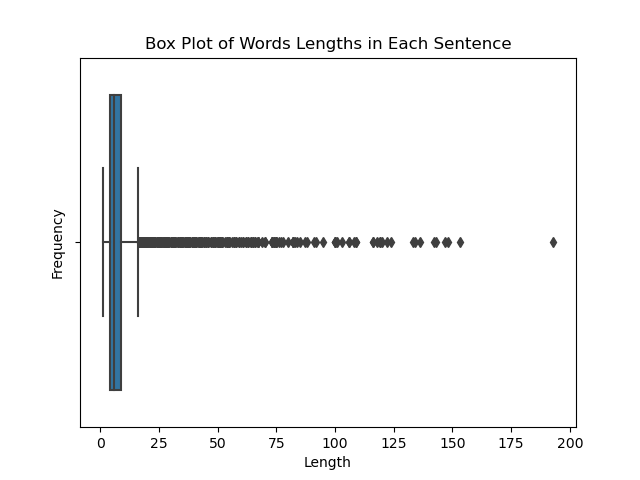

In [4]:
Image("../data/eda/box_plot_word_length.png")

After removing the outliers..

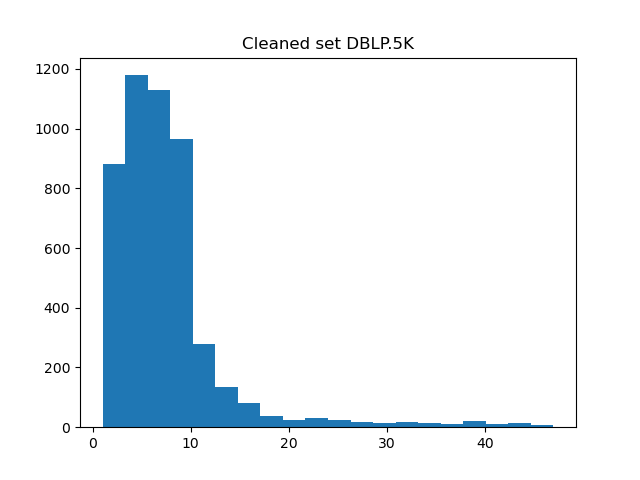

In [5]:
Image("../data/eda/cleaned_set.png")

What is the distribution of all tokens? How many "rare" tokens (e.g., < 5 times)?

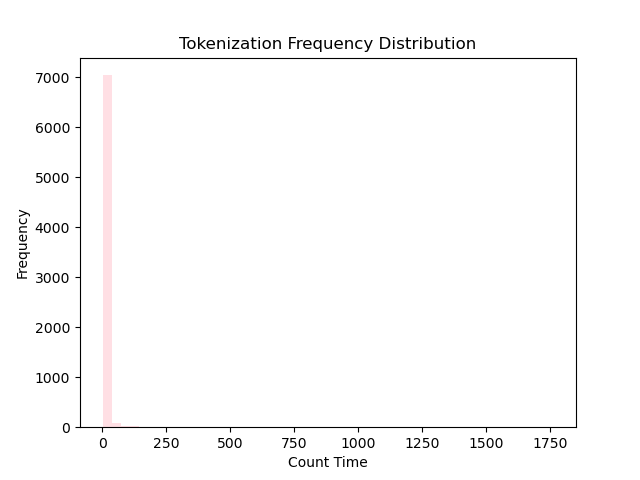

In [6]:
Image("../data/eda/tokens_freq.png")

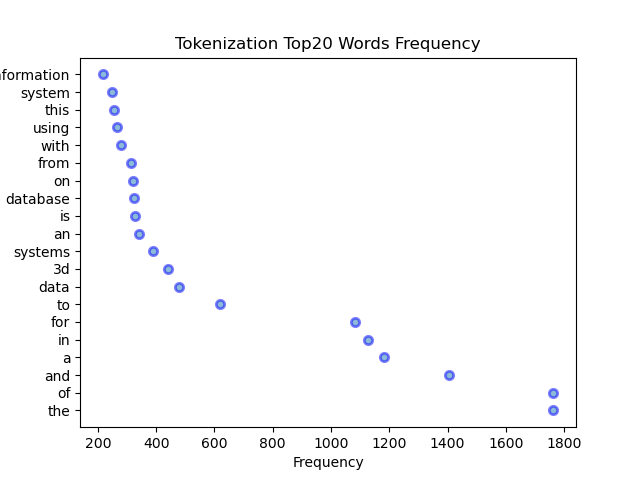

In [11]:
Image("../data/eda/tokens_top20_words.png")

In [8]:
f = open("../data/eda/description.txt", "r")
print(f.read())

There are 4007 sentences in this input text file. The mean of the input text word length is around 9 for each sentence with the standard deviation 13. Number of Rare tokens is 5910 (which defined as the the number of tokens is less than 5).


### Output Analysis

Run AutoPhrase, and then plot the quality score distribution of single-word and multi-word phrases separately.

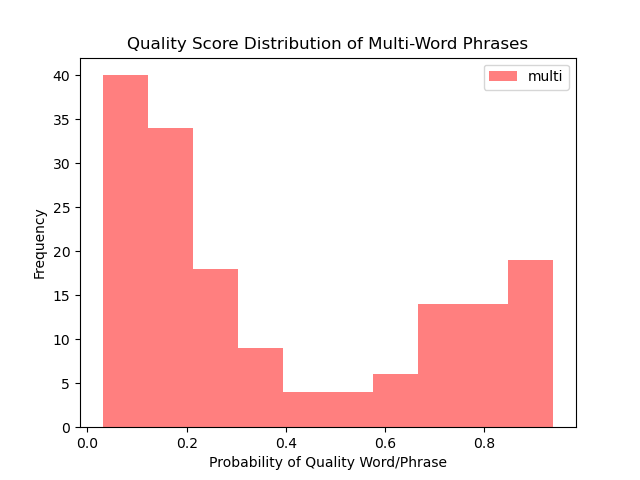

In [12]:
Image("../data/outputs/multi_value_distribution.png")

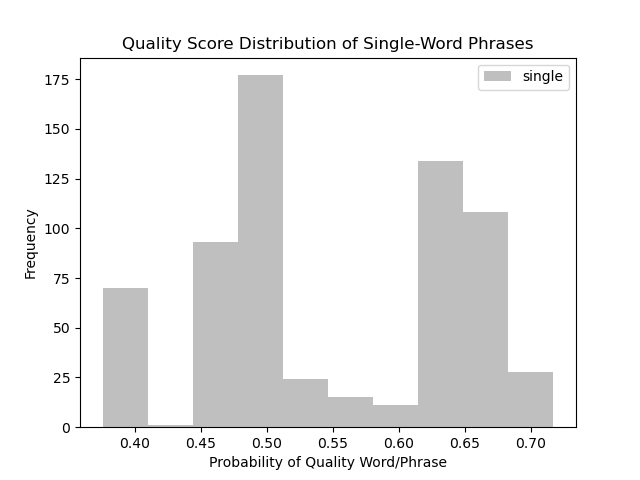

In [13]:
Image("../data/outputs/single_value_distribution.png")

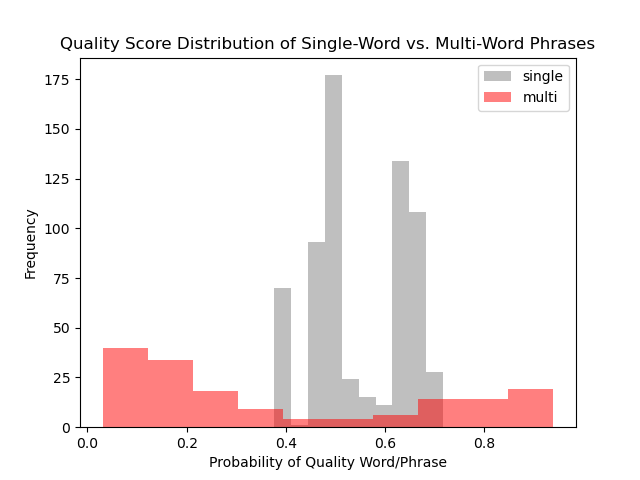

In [14]:
Image("../data/outputs/comparison_quality_score.png")

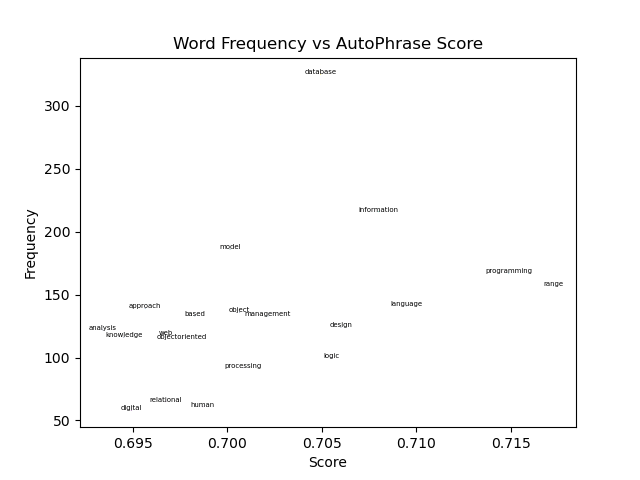

In [15]:
Image("../data/outputs/freq_score_plot.png")

### TF-IDF & AutoPhrase results

AutoPhrase results include sets of sorted quality phrases but sometimes they are not “high quality” enough even with high quality scores. We use TF-IDF Score* AutoPhrase quality score to measure the “quality” of a phrase.
In information retrieval, tf–idf/TF*IDF/TFIDF (short for term frequency–inverse document frequency), is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. 
We use the TfidfVectorizer class from the sklearn.feature_extraction.text library to perform TF-IDF analysis and combine it with the AutoPhrase result.

We use the input text analyzing with TF-IDF and generate the word with corresponding quality values. After normalizing, we multiply the value with the Autophrase result and select the top 20 high quality phrases, which make the word cloud much more meaningful than only using the Autophrase itself only.

In [16]:
#tf-idf top 20 for single word
res = pd.read_csv('../data/outputs/tfidfsingle.csv')
res.head(20)

,Word,Score
0,systems,1.000000
1,data,0.986594
2,database,0.945130
3,3d,0.713369
4,databases,0.609674
5,information,0.554792
6,programming,0.546746
7,using,0.494745
8,modeling,0.490921
9,model,0.428595


In [17]:
#autophrase top 20 single
ds = pd.read_csv('../data/outputs/qualitysingle.csv')
ds.head(20)

,Score,Word
0,0.717242,range
1,0.709456,language
2,0.707983,information
3,0.706008,design
4,0.705491,logic
5,0.704934,database
6,0.702155,management
7,0.700830,processing
8,0.700649,object
9,0.700148,model


In [18]:
#multiplication top 20 single
mul = pd.read_csv('../data/outputs/multiplicationsingle.csv')
mul.head(20)

,Word,Score
0,systems,0.680173
1,data,0.678809
2,database,0.666254
3,databases,0.402040
4,3d,0.396027
5,information,0.392783
6,modeling,0.328645
7,model,0.300080
8,language,0.299972
9,objectoriented,0.296517


In [19]:
#tf-idf top 20 multi
res = pd.read_csv('../data/outputs/tfidfmulti.csv')
res.head(20)

,Word,Score
0,database systems,1.000000
1,data mining,0.937370
2,information systems,0.523989
3,programming language,0.483070
4,logic programming,0.470176
5,objectoriented database,0.415367
6,query processing,0.412304
7,knowledge discovery,0.364865
8,range images,0.364566
9,information retrieval,0.326568


In [20]:
#autophrase top 20 multi
ds = pd.read_csv('../data/outputs/qualitymulti.csv')
ds.head(20)

,Score,Word
0,0.939180,knowledge management
1,0.930222,information retrieval
2,0.921603,programming languages
3,0.916816,query language
4,0.909308,relational database
5,0.906608,transaction processing
6,0.903549,concurrency control
7,0.901075,relational databases
8,0.897878,database management systems
9,0.894858,machine learning


In [22]:
#multiplication top 20 multi
mul = pd.read_csv('../data/outputs/multiplicationmulti.csv')
mul.head(20)

,Word,Score
0,database systems,0.888096
1,data mining,0.831924
2,information systems,0.435511
3,logic programming,0.409201
4,query processing,0.320402
5,information retrieval,0.303781
6,objectoriented database,0.287197
7,knowledge discovery,0.283968
8,range images,0.278639
9,data structures,0.262339


Instead of using AutoPhrase result only,  we use (AutoPhrase score * TF-IDF score) as the metric to evaluate the quality of a phrase. Then, we used a word cloud to visualize the phrases with top quality scores, since it is a better representative of the input text corpus. 

In [23]:
#multiplication top 20 combined
final = pd.read_csv('../data/outputs/multiplicationall.csv')
final.head(40)

,Word,Score
0,database systems,0.89
1,data mining,0.83
2,systems,0.68
3,data,0.68
4,database,0.67
5,information systems,0.44
6,logic programming,0.41
7,databases,0.40
8,3d,0.40
9,information,0.39


### Sentiment Analysis

Sentiment analysis (or opinion mining) is a natural language processing technique used to determine whether data is positive, negative or neutral.
We use textblob to give both a polarity and subjectivity score on each sentence of the text corpus. Then plot a distribution based on that. This would give user an insight on whether the corpus is positive or negative overall and if it’s more rational or emotional.

Figures shown below are the sentiment analysis result for DBLP.5K.txt. Since this a scientific journal, not surprisingly the polarity and subjectivity is zero for most sentences, meaning most of them of quite neutral and objective. This meets our expectation.

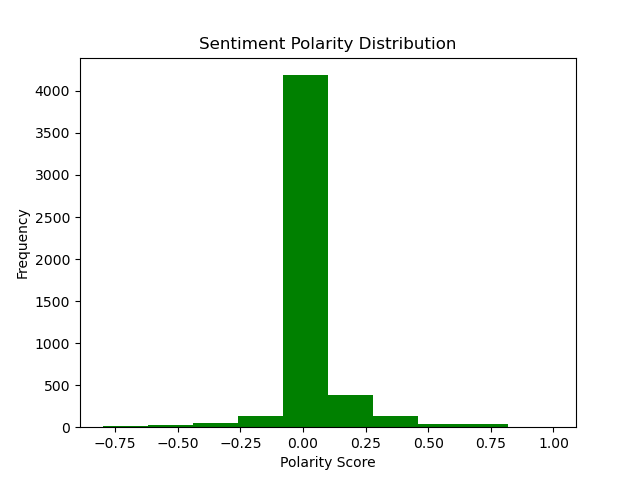

In [24]:
Image("../data/outputs/sentiment_polarity_distribution.png")

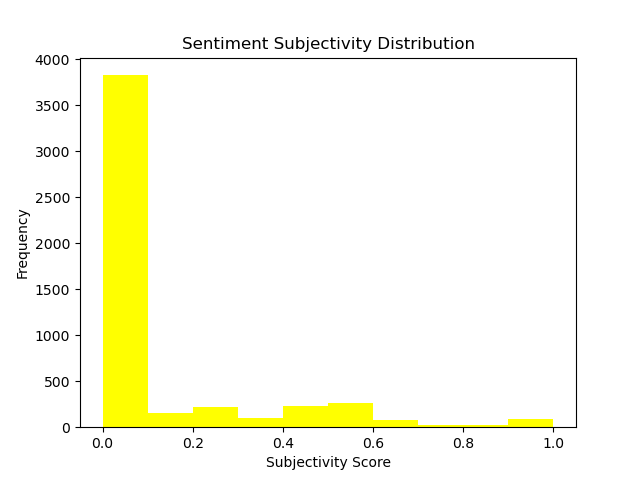

In [25]:
Image("../data/outputs/sentiment_subjectivity_distribution.png")